# Project RellCell
Tools Covered:
EDA
Linear Regression
Linear Regression Assumptions
Business Insights and recommendations

> They have hired me as a Data Analyst. They want to analyze the data provided and build a linear regression model to predict the price of a phoneused tablet and identify the factors that influence it significantly.
### Objetive
The growing potential of this market comparatively under radar feeds the need for a ML -based solution to develop a dynamic price strategy for used and reconditioned devices. Rell, a startup that seeks to take advantage of the potential of this market.
### Business context
The purchase and sale of telephone numbers and tablets used to be something that happened in a handful of online market sites. But the market of used and reconditioned devices has grown considerably during the last decade, and a new prognosis of IDC (International Data Corporation) predicts that the used telephone market will have a value of \ $ 52.7 billion by 2023 with a rate of annual compound growth (CAGR) of 13.6 % from 2018 to 2023. This growth can be attributed to an increase in the demand for telephones and tablets Used that offer considerable savings compared to new models.
Restored and used devices continue to provide profitable alternatives for both consumers and companies that seek to save money when buying one. There are many other benefits associated with the used device market. Used and reconditioned devices can be sold with guarantee and can also be assured with the purchase voucher. SUPPLIERS/Third Party Platforms, such as Verizon, Amazon, etc., offer attractive offers to customers for reconditioned devices. Maximizing the longevity of devices through second -hand trade also reduces their environmental impact and helps recycle and reduce waste. The impact of COVID-19 outbreak can further boost this segment, since consumers reduce discretionary expenses and buy phones and tablets only for immediate needs.
### Data description
The data contain the different telephone and tablet attributes used/reconditioned. The data was collected in 2021. The detailed data dictionary is provided below.
--Band_name: Manufacturing brand name
-OS: operating system in which the device is executed
-Screen_size: screen size in cm
-4g: if 4g is available or not
-5g: if 5g is available or not
-Main_camera_mp: resolution of the rear camera in megapixels
-Selfie_camera_mp: resolution of the front camera in megapixels
-int_memory: amount of internal memory (ROM) in GB
-Rra: Amount of RAM in GB
-Battery: Energy capacity of the device battery in MAH
-Weight: weight of the device in grams
-Release_year: year the device model was launched
-Days_used: number of days that the used/rebuilt device has been used
-Normalized_new_price: standardized price of a new device of the same model in euros
-Normalized_USED_Price: standardized price of the device used/reconditioned in euros

## We will start importing the necessary libraries

In [23]:
# We will begin to load the necessary libraries of Python# %Load_ext NB_Black
# Libraries to manipulate the dataimport numpy as np
import pandas as pd

# Libraries for data viewing as graphicsimport matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# We will divide the data into training and tryfrom sklearn.model_selection import train_test_split

# To build a linear regression modelfrom sklearn.linear_model import LinearRegression

# To check the model performancefrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build a linear regression model using statsmodelsimport statsmodels.api as sm

# To calculate viffrom statsmodels.stats.outliers_influence import variance_inflation_factor

## We load database

In [24]:
# We load the data of the USed_Device_data file, which was provided to usdata = pd.read_csv('used_device_data.csv') 

## We make data summary

The initial steps to obtain an overview of any data set are:- Observe the first rows of the data set, to verify whether the data set has been loaded correctly or not- Obtain information on the number of rows and columns in the data set- Find out the data types of the columns to ensure that the data is stored in the favorite format and that the value of each property is expected.- Verify the statistical summary of the data set to obtain a general description of the numerical columns of the data

### Visualization of the first and last rows of the data set
---



In [25]:
# We show the first 5 rows of the data setdata.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


> In the first 5 rows and columns they do not show whether null or missing values

In [26]:
# We show the last 5 rows of the data setdata.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


> In the last 5 rows and columns it is observed that, if there are missing values ​​(nan)

### Checking the data set

In [27]:
# With Shape we observe the number of rows and columns of the data or databasedata.shape 

(3454, 15)

> There are 3454 rows and 15 columns in the file or database

### checking the data types of the columns for the data set

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- The columns of Brand_name, OS, 4G and 5G are of the type of object data (string).- The columns of Screen_size, Main_camera_mp, Selfie_Camare_MP, Int_memory, Ram, Battery, Weight,Normalized_used_Price and normalized_New_price are float type (decimal).- The relaase_year and days_use columns are entirely.

### Statistical summary of the database

In [29]:
# With the describes method it helps us to see a statistical summary of the datadata.describe().T 

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


- In the Count column it is perfectly observed that in the fields of main_camera_mp, selfie_camera_mp,Battery and Weight are missing values, since they are under the total of the total rows that are 3454.- The average and the median (50 %) in the fields, it is remarkable, it can be due to the lost values.- The average normalized_new_price is higher with respect to normalized_use_price, as well as the maximumand the minimum, the first and the third quarter, as well as the median.

### checking the presence of lost values

In [31]:
# The ISNULL method together with the Sum method, they throw us the presence of lost values.data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [32]:
# With the ISNA method together with the Sum method they also let us see the lost valuesdata.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [33]:
# The ISNULL method together with the Any method, gives us a TRUE or False value, to tell us whether there are lost values ​​or not.data.isnull().any()  

brand_name               False
os                       False
screen_size              False
4g                       False
5g                       False
main_camera_mp            True
selfie_camera_mp          True
int_memory                True
ram                       True
battery                   True
weight                    True
release_year             False
days_used                False
normalized_used_price    False
normalized_new_price     False
dtype: bool

> It is observed that the fields of: Main_camera_MP have 179 lost values, selfie_camera_mp has 2 requested values,Int_memory and RAM have 4 lost values, Battery has 6 lost values ​​and Weight has 7 lost values.Later we will deal with this hay of lost values.

### checking if there are duplicate values

In [34]:
data.duplicated().sum() # checamos si hay duplicados con el comando duplicated y con el comando sum para traer el
# Total of duplicate elements (for all the dataframe or all the columns or file)

0

In [35]:
# The nunique method on the brand_name field shows the number of field valuesdata['brand_name'].nunique()

34

In [36]:
# The unique method shows us all the values ​​of the Brand_name fielddata['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [37]:
# The nunique method on the field throws the number of field valuesdata['os'].nunique()

4

In [38]:
# The unique method shows us all the values ​​of the fielddata['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

> There are no duplicate values ​​in the key field (brand_name and os)

In [39]:
# We are going to create a copy of the data so that the original data remains unchanged# because we will make some modifications to the data or database.df = data.copy()

## EDA data exploratory analysis

### Univariate analysis

In [40]:
# We are going to draw a cash diagram and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined 

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # # Número de filas subplot grid= 2
        sharex=True,  # x-axis será compartido por los subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creando los 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot creará y un triángulo indicando el valor medio de la columna
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # para el histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Añadiendo la media para el histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Añadiendo la mediana para el histogram

In [41]:
# Function to create bars diagrams with labels

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # porcentaje de cada clase de la categoría
        else:
            label = p.get_height()  # recuento de cada nivel de la categoría

        x = p.get_x() + p.get_width() / 2  # ancho del plot
        y = p.get_height()  # alto del plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # anotando el porcentaje

    plt.show()  # mostrar el plot

** `Using the above functions, to graph the field: normalized_USED_price` **- And to answer the question of:- How is the distribution of standardized prices of used devices?

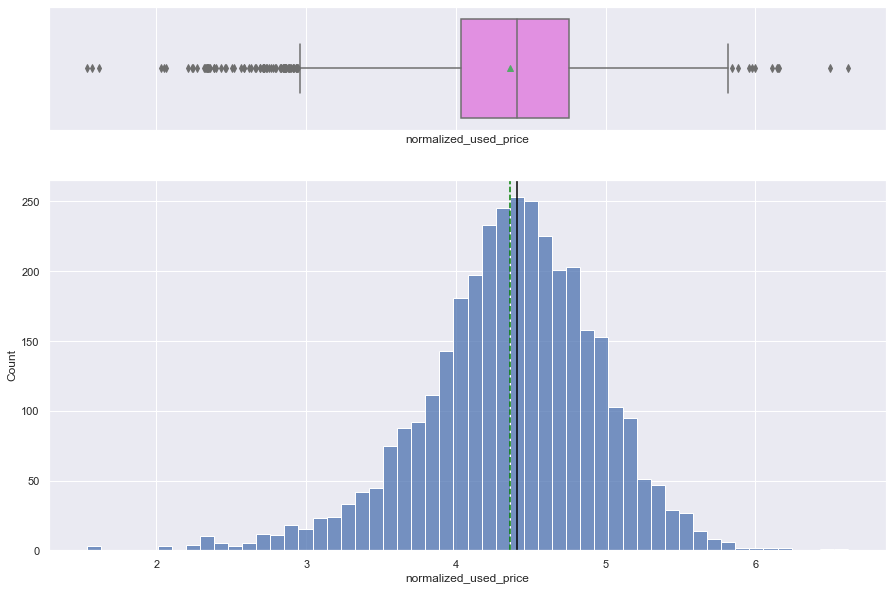

In [42]:
histogram_boxplot(df, "normalized_used_price")

> The distribution of the normalized_use_price column is slightly biased to the left, near the normal distribution. with a median of 4.5.

** `Using the above functions, to graph the field: normalized_new_price` **

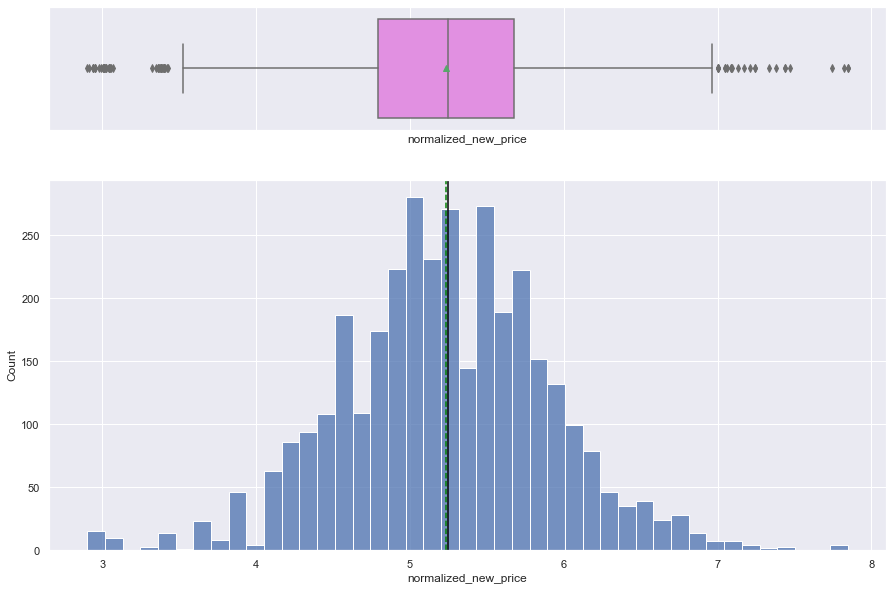

In [44]:
# It is called the function histogram_boxploot, send the parameter of DF and normalized_new_pricehistogram_boxplot(df,'normalized_new_price')

> The distribution of the normalized_new_price column is almost touching the median of 5.3

** `Using the above functions, to graph the field: Screen_Size` **

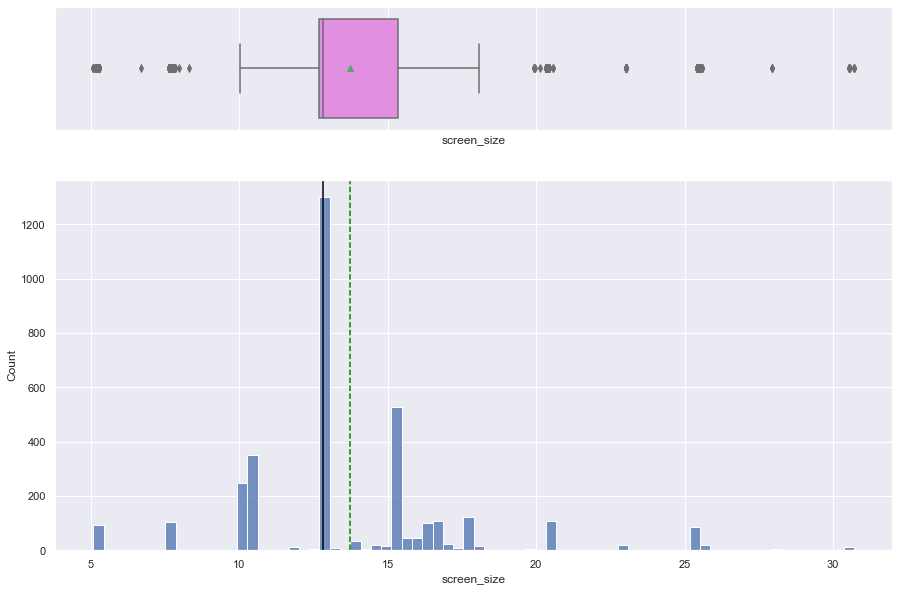

In [45]:
# It is called the Histogram_Boxploot function, the DF and Screen_size parameter mandolehistogram_boxplot(df,'screen_size')  

> The distribution of the column of Screen_Size is biased slightly to the right, having its median in 14.In other words, the average size of Screen_Size is 14.

** `Using the above functions, to graph the field: Main_camera_mp` **

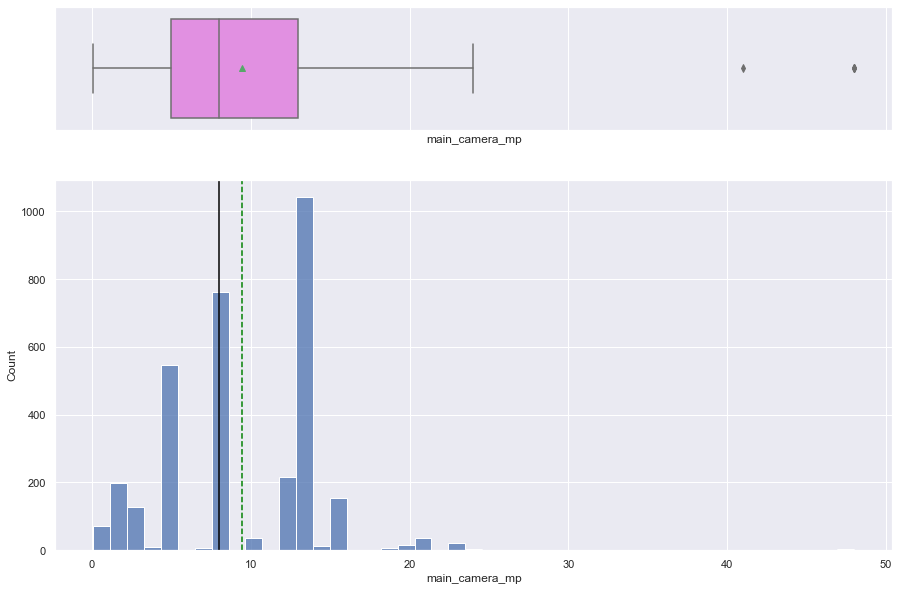

In [46]:
# It is called the function histogram_boxploot, send the parameter of DF and main_camera_mphistogram_boxplot(df,'main_camera_mp')  

> The distribution of the Main_camera_MP column is biased slightly to the right, having its median in 7. So,The rear camera resolution in Megapixel is 7.

** `Using the above functions, to graph the field: selfie_camera_mp` **

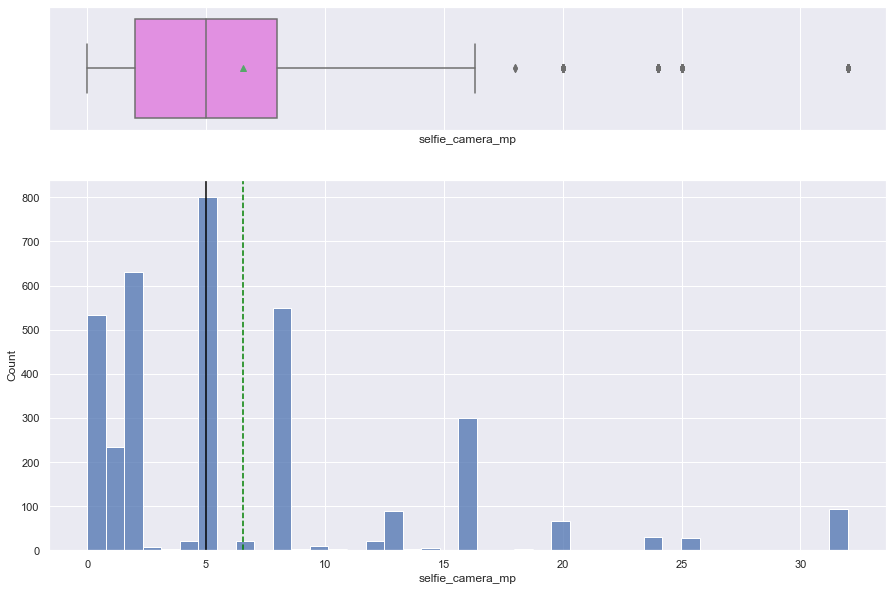

In [47]:
# It is called the function histogram_boxploot, send the parameter of DF and selfie_camera_mphistogram_boxplot(df,'selfie_camera_mp')  

> The distribution of the Selfie_Camera_MP column is slightly biased to the right, having its median by 5. So, the resolution of the front camera in Megapixel is 5 (on average).

** `Using the above functions, to graph the field: int_memory` **

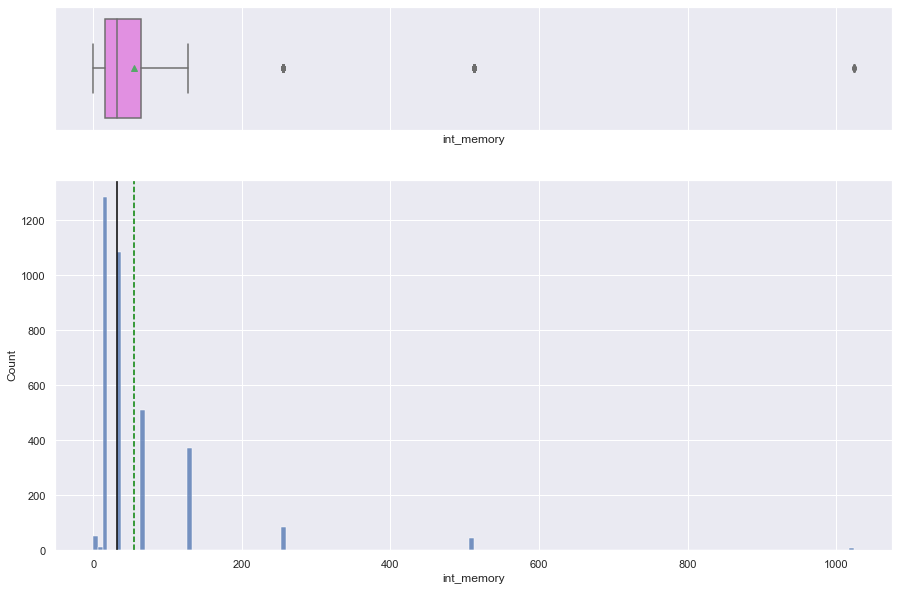

In [48]:
# It is called the function histogram_boxploot, send the parameter of DF and int_memoryhistogram_boxplot(df,'int_memory') 

> The distribution of the int_memory column is biased slightly to the right. Being its median very far from the 100in GB (amount of internal memory (ROM).

** Using the above functions, to graph the field: `RAM` **

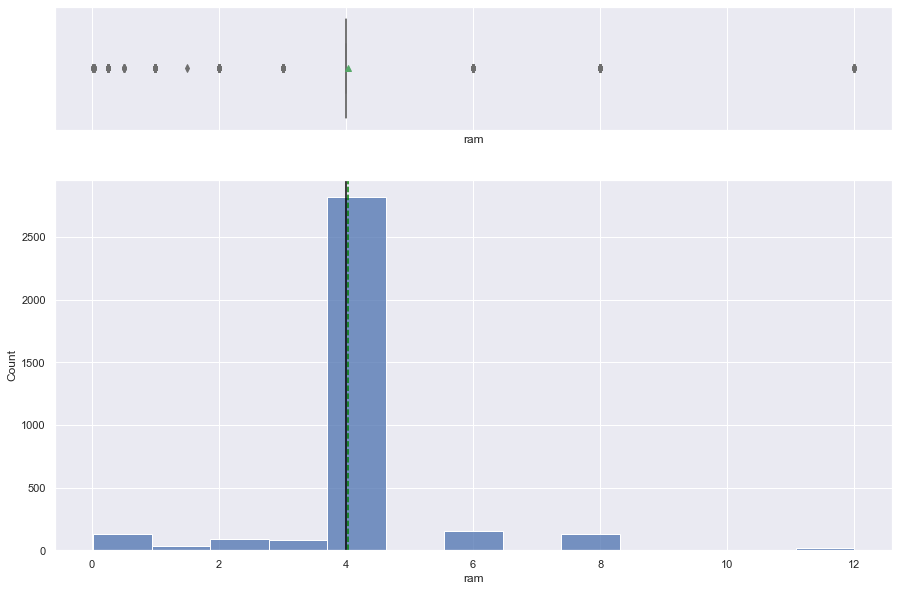

In [49]:
# It is called the Histogram_Boxploot function, the DF and RAM parameter senthistogram_boxplot(df,'ram')  

> The distribution of the RAM column is practically on the median. Being its median of 4, means thatThe average has 4 GB of RAM

** Using the above functions, to graph the field: `Weight` **

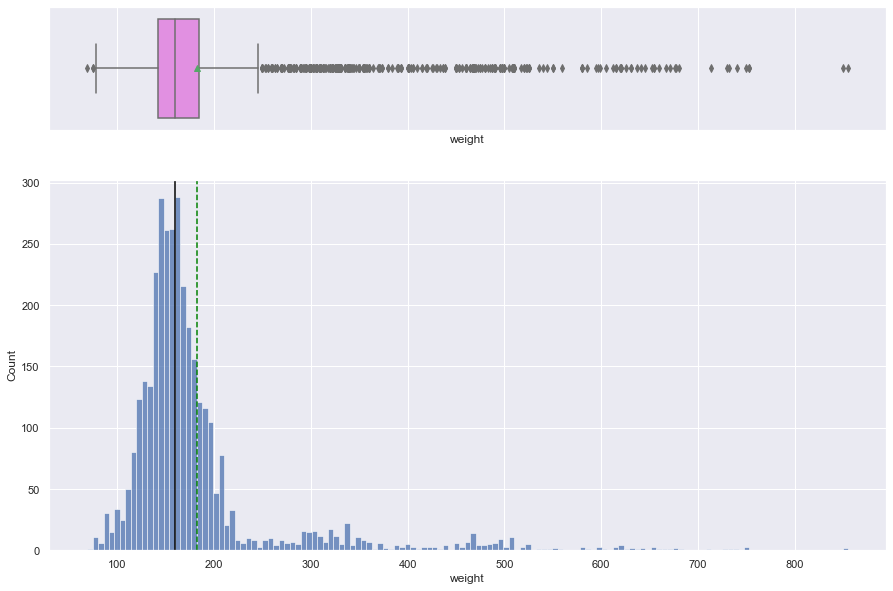

In [50]:
# It is called the Histogram_Boxploot function, I send the DF and Weight parameterhistogram_boxplot(df,'weight') 

> The distribution of the Weight column is biased to the right over the median.  The weight of 150 grams being the average.

** Using the above functions, to graph the field: `Battery` **

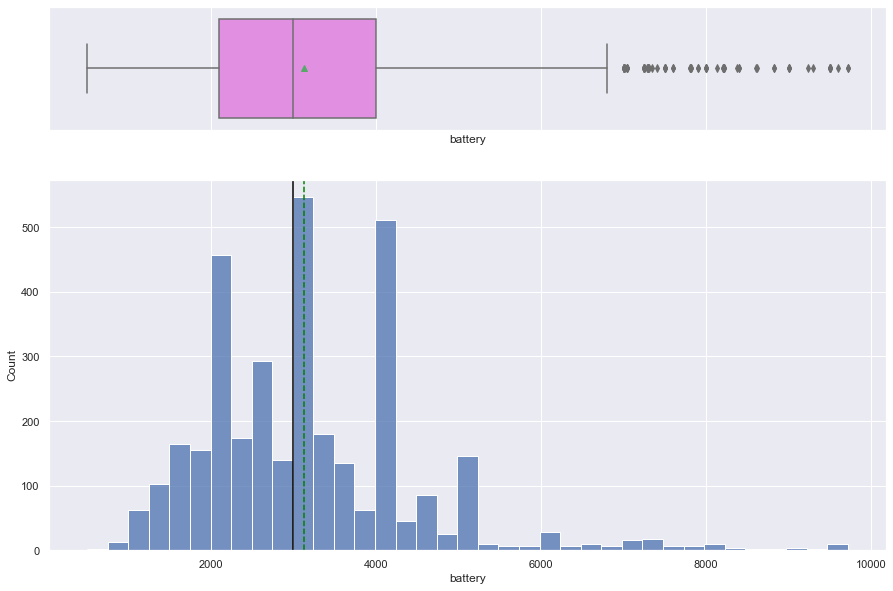

In [51]:
# The Histogram_Boxploot is called, I send the DF and Battery parameterhistogram_boxplot(df,'battery') 

> The distribution of the Battery column is biased to the right on the median. Being the average of theEnergy capacity of 3000 batteries in MAH

** Using the above functions, to graph the field: `Days_used` **

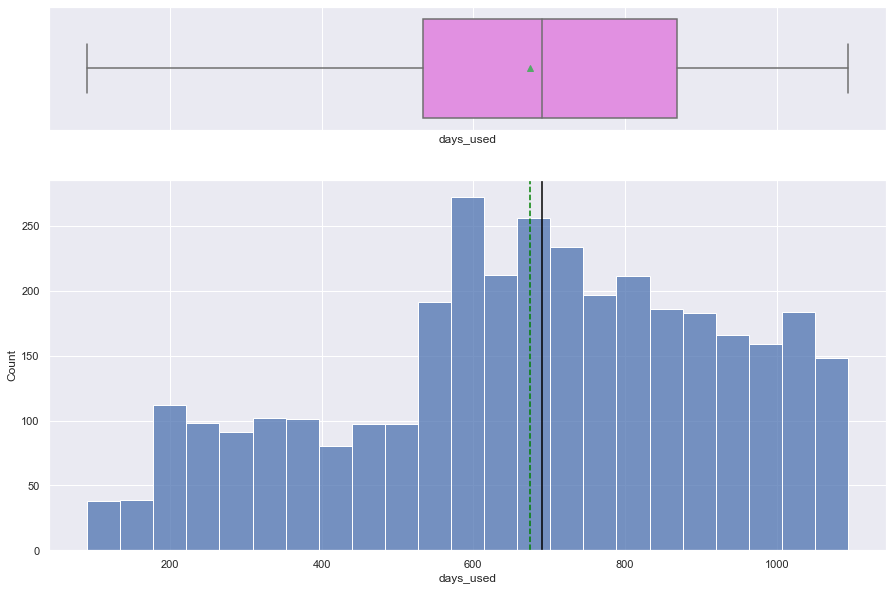

In [52]:
# It is called the function histogram_boxploot, send the parameter of DF and Days_usedhistogram_boxplot(df,'days_used')  

> The distribution of the Battery column is biased to the left on the median. Being the average number of days that the device has been used about 680.

** Using the above functions, to graph the field: `brand_name` **

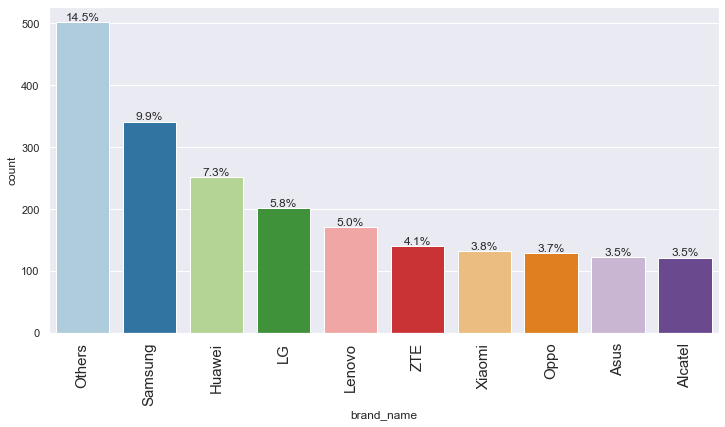

In [53]:
# Laboled_Barplot is called, I send the DF and Brand_name parameterlabeled_barplot(df, "brand_name", perc=True, n=10)

> It is observed that Others is the largest brand that is used, (we assume that here is the iPhone brand that is not in the data provided and that it is one of the most used brands worldwide). The Samsung brand is secondly, in third Huawei and fourth LG. Being the last most used brand Alcatel.

** `Using the above functions, to graph the field: OS` **- And to answer the question of:- What percentage of the used device market is dominated by Android devices?

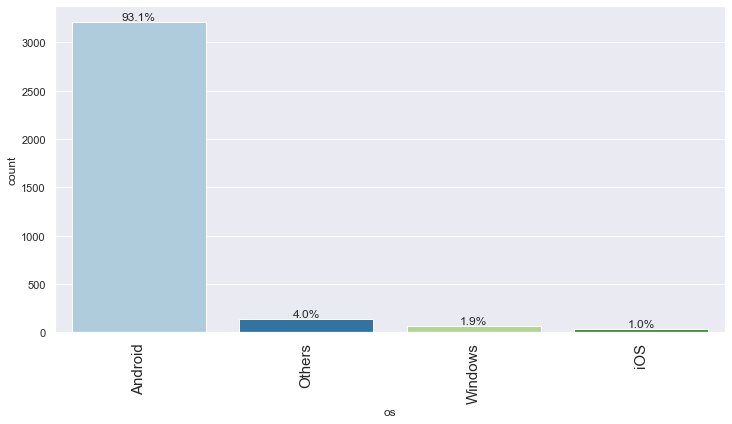

In [54]:
# Laboled_Barplot is called, send the DF parameter and youlabeled_barplot(df, "os", perc=True, n=10) 

> It is observed that Android is the most used operating system, followed by OThers (we assume that here is the MAC operating system) in third place this Windows and in the last place this iOS.

** `Using the above functions, to graph the field: 4G` **

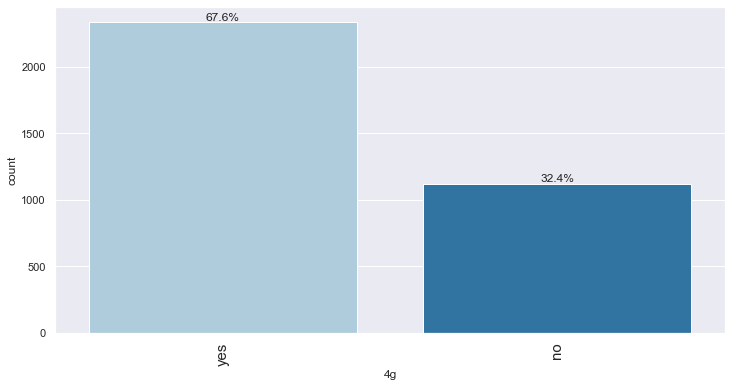

In [55]:
# Laboled_Barplot is called, send the DF and 4G parameterlabeled_barplot(df, "4g", perc=True, n=10) 

> It is observed that 4g if it is more available to no.

** `Using the above functions, to graph the field: 5G` **

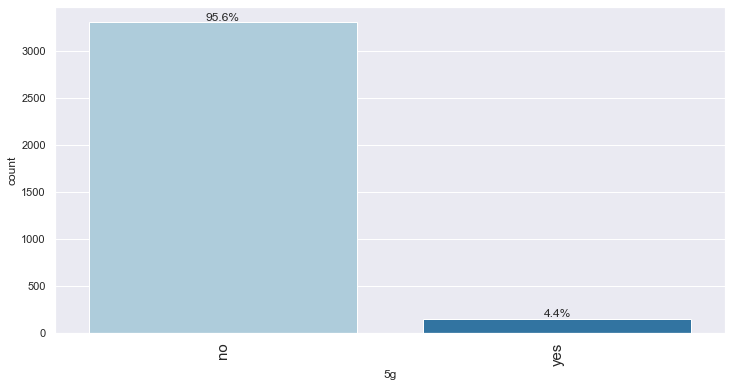

In [56]:
# Laboled_Barplot is called, I send the DF and 5G parameterlabeled_barplot(df, "5g", perc=True, n=10) 

> It is observed that 5g if it is much more available to no.

** `Using the above functions, to graph the field: relaase_yar` **

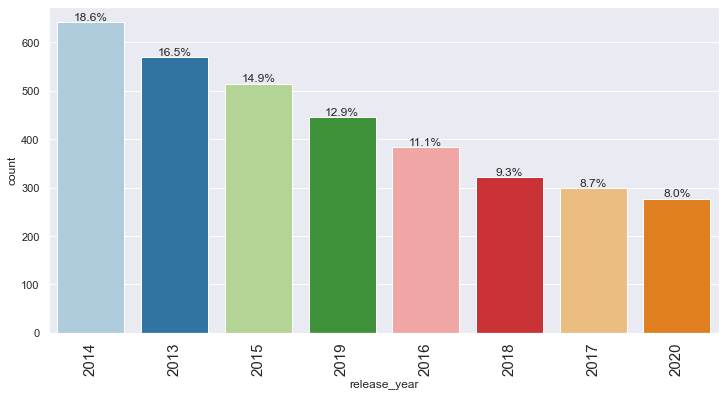

In [57]:
# Laboled_Barplot is called, send the DF and Release_year parameterlabeled_barplot(df, "release_year", perc=True, n=10) 

> It is observed that 2014 is the year in which the most used device and model was launched, while the year 2020 is the year of the less used model.

### Bivariate analysis

** Reviewing correlation **- It is always good to know the correlation between variables in this case we will not focus on the question of:- What attributes are highly correlated with the standardized price of a device used?

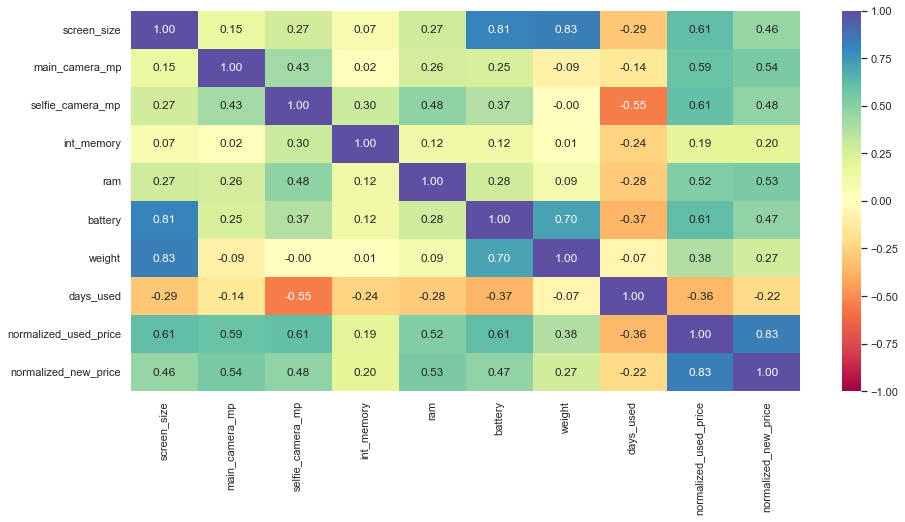

In [58]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping relaase_yar as it is a variable temporarycols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- According to the previous graph, the variables that correlates with the standardized price of a device used are:- Battery, RAM, Selfie_Camara_MP, Main_camara_MP and Screen_Size.

** Remember that it is usually interpreted as follows: **- Neighborhood correlation: R <| 0.1 |- Low correlation: | 0.1 | <r <= | 0.3 |- Medium correlation: | 0.3 | <r <= | 0.5 |- Strong or high correlation: r> | 0.5 |

** The amount of RAM is important for the proper functioning of a device. Let's see how the amount of RAM varies between brands. **- And with this we will answer the question of:- How varies the amount of RAM according to the brand?

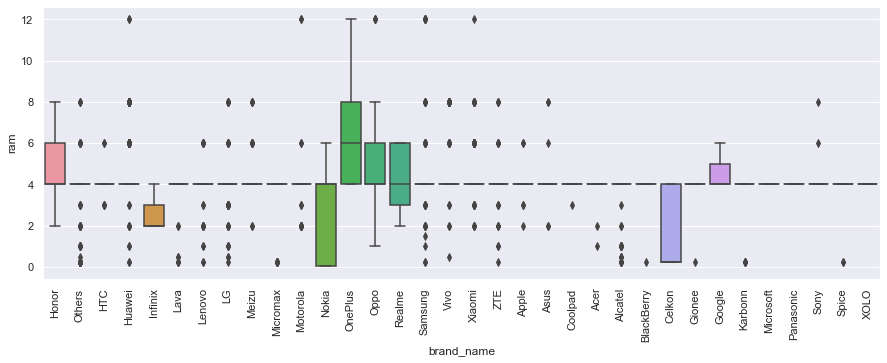

In [60]:
# We create a bpxploot graph for the Brand_name and RAM columns, to know the operation of the devices# By brand and RAM memoryplt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

> Only 4 brands exceed the average of 4 GB in RAM. (Honor, OnePlus, Oppo, Pealme and Google)Obviously, the greater the RAM is better the performance, in rapidity of response, independentlyof the brand. One thing is RAM and another very different the durability or resistance of the brand in differentdevices

** People who travel frequently require devices with large batteries to work during the day. But the big battery often increases the weight, which makes it feel uncomfortable in the hands. We are going to create a new data of only those devices that offer a great battery and analyze. **- And with the following process we will answer the question of:- How varies the weight of the phones and tablets that offer large batteries (more than 4500 mAh)?

In [61]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

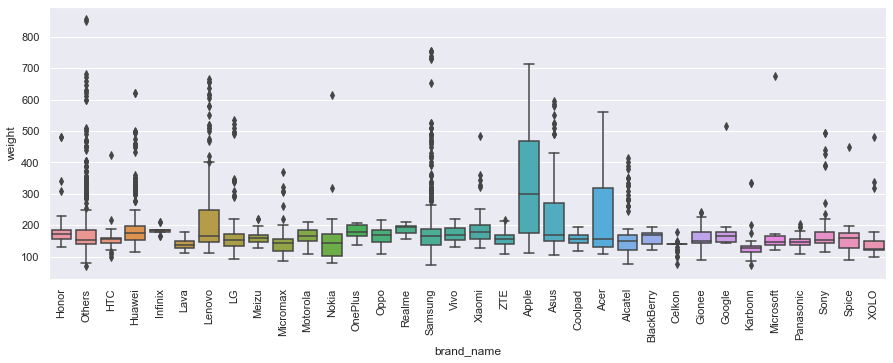

In [62]:
# We create a bpxploot graph for brand_name and weight columnsplt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight") 
plt.xticks(rotation=90)
plt.show()

> The Apple, Acer and Agus brand are the most weight brands, the other brands are very pair on average in terms of weight.

** People who buy phones and tablets mainly for entertainment purposes prefer a large screen, since they offer a better visualization experience. We will create a new data frame of only those devices that are suitable for these people and analyze. **- And with the following steps we will answer the question of:- How many phones and tablets are available in different brands with a screen size of more than 6 inches?

In [63]:
# We create a new Data Frame for only those devices that use a large screen.df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

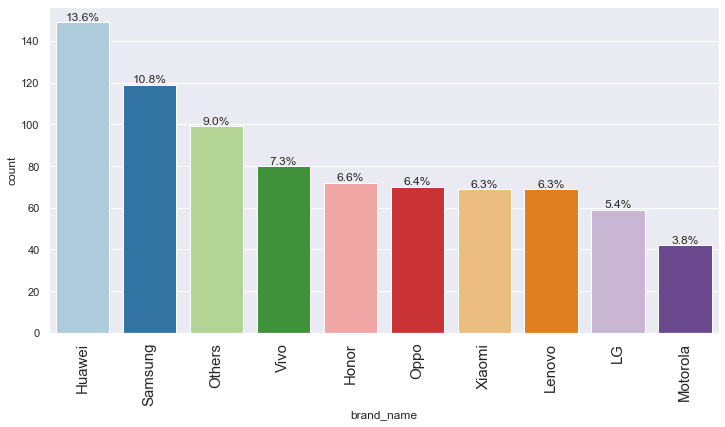

In [64]:
## We use the work Labeled_BapLot by passing the parameters of df_large_screen and brand_namelabeled_barplot(df_large_screen, "brand_name", perc=True, n=10)


> Huawei, Samsung and Others brands are those that offer large screens with good definition,being the Motorola brand who offers hands large screens.

** Everyone likes a good camera to capture their favorite moments with their loved ones. Some customers specifically look for good front cameras to click great selfies. We will create a new data frame of only those devices that are suitable for this client and analyze them. **- To answer the question of what is the distribution of devices that offer cameras for selfies of more than 8 MP between brands?- We will do the processes below, to answer this question.

In [65]:
# We create a new Data Frame for only those devices that use good selfies resolution.df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

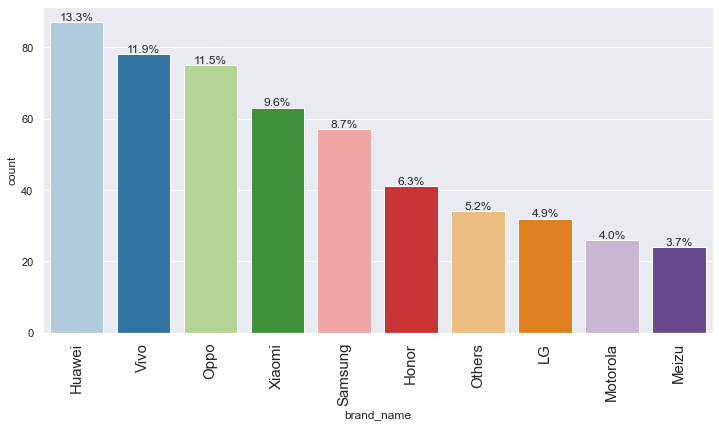

In [66]:
## We use the work Labeled_Barplot by passing the parameters of df_selfie_camera and brand_namelabeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10)

> The Huawei, Vivo and Oppo brand provide a good set in selfies in the devices they offer, beingMEISU of lower quality in selfies

** Let's do a similar analysis for the rear cameras. **
- The rear cameras generally have a better resolution than the front cameras, so we establish a higher threshold for them in 16MP.

In [67]:
# We create a new Data Frame for only those devices with a better frontal resolution only 16MP.df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

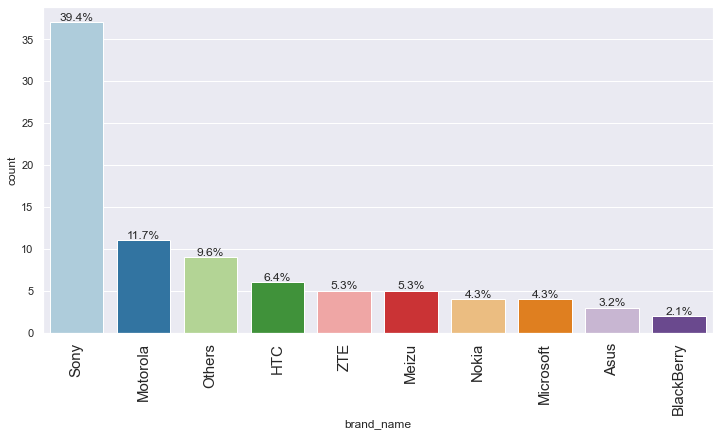

In [68]:
# We use the work Labeled_Barplot by passing the parameters of df_main_camera and brand_namelabeled_barplot(df_main_camera, "brand_name", perc=True, n=10)

> The Sony brand is the one with the greatest frontal resolution and BlackBerry the one that has the least front resolution.

** Let's see how the price of the devices used over the years varies. **

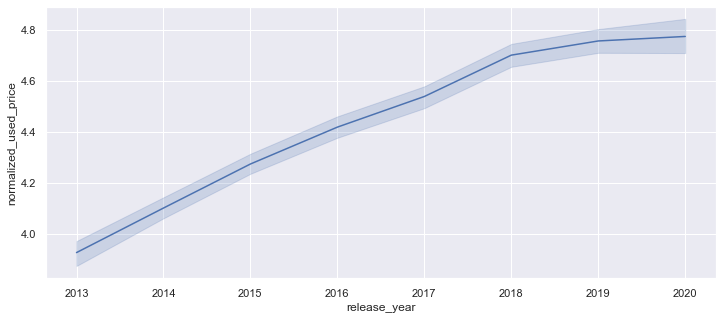

In [69]:
plt.figure(figsize=(12, 5))
## We create the lineloot graph for relaase year and standardized_used_pricesns.lineplot(data = df, x = 'release_year', y = 'normalized_used_price') 
plt.show()


> The graph shows an upward trend from 2013 to 2018, from 2019 and 2020 the trendIt increases, but not as considerable as in the previous years.

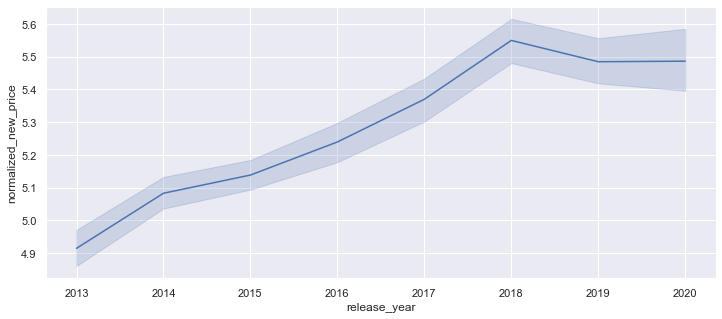

In [70]:
plt.figure(figsize=(12, 5))
## We create the lineloot graph for relaase year and normalized_new_pricesns.lineplot(data = df, x = 'release_year', y = 'normalized_new_price') 
plt.show()


> The graph shows an upward trend from 2013 to 2018, in 2019 the trendIt decreases by 2020 the trend is constant.  

** Let's look at how the prices of the phones and tablets vary that offer 4G and 5G networks. **

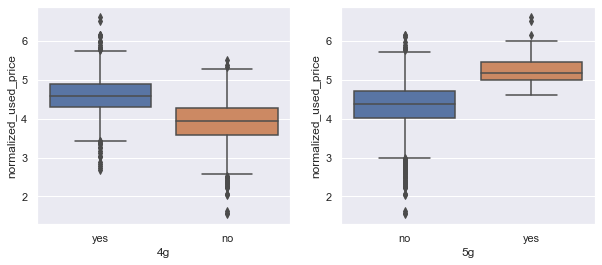

In [71]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

> The price is higher for new 5G devices, although they are not available, they are even higher than 4g.

## Data processing

### Back value imputation
- We will impute the missing values ​​in the data by the medians of the columns grouped by `relaase_yar` and` Brand_name`.

In [72]:
# We create a copy of our last data frames used, to work on missing datadf1 = df.copy()

In [73]:
# We are checking again if there are missing values ​​now on our new Data Frame# Remember that we use the ISNULL function next to the sum.df1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

> As we already knew the columns with missing data are: Main_camera_mp, selfie_camera_mp, int_memory,RAM, Battery, Weight.

In [74]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   
# We impute the missing values ​​in Cols_impute with the median, grouping the data on the launch year# And the brand name# We check missing valuesdf1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

> The fields or columns of Int_memory and Ram already appear with 0 missing

- We will impute the remaining missing values ​​in the data by the medians of the columns grouped by `Brand_name`.

In [75]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) 
## We impute the missing values ​​in Cols_impute with the median grouping the data in the name of the brand# We check missing valuesdf1.isnull().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

> Now there is only the Main_camera_MP field that is free of missing data

- We will complete the remaining missing values ​​in the `Main_camera_mp` column by the medium column.

In [76]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median)  
## We impute the main_camera_mp field with the median# We check missing datadf1.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

> Finally, there are no columns with missing data

### Features engineering

- We are going to create a new column `Years_since_release` from the` relaase_yar` column.- We will consider the year of data collection, 2021, as a base.- We will remove the `relaase_year` column.

In [77]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Verification of atypical values ​​EDA


- Let's check if there are atypical values ​​in the data.

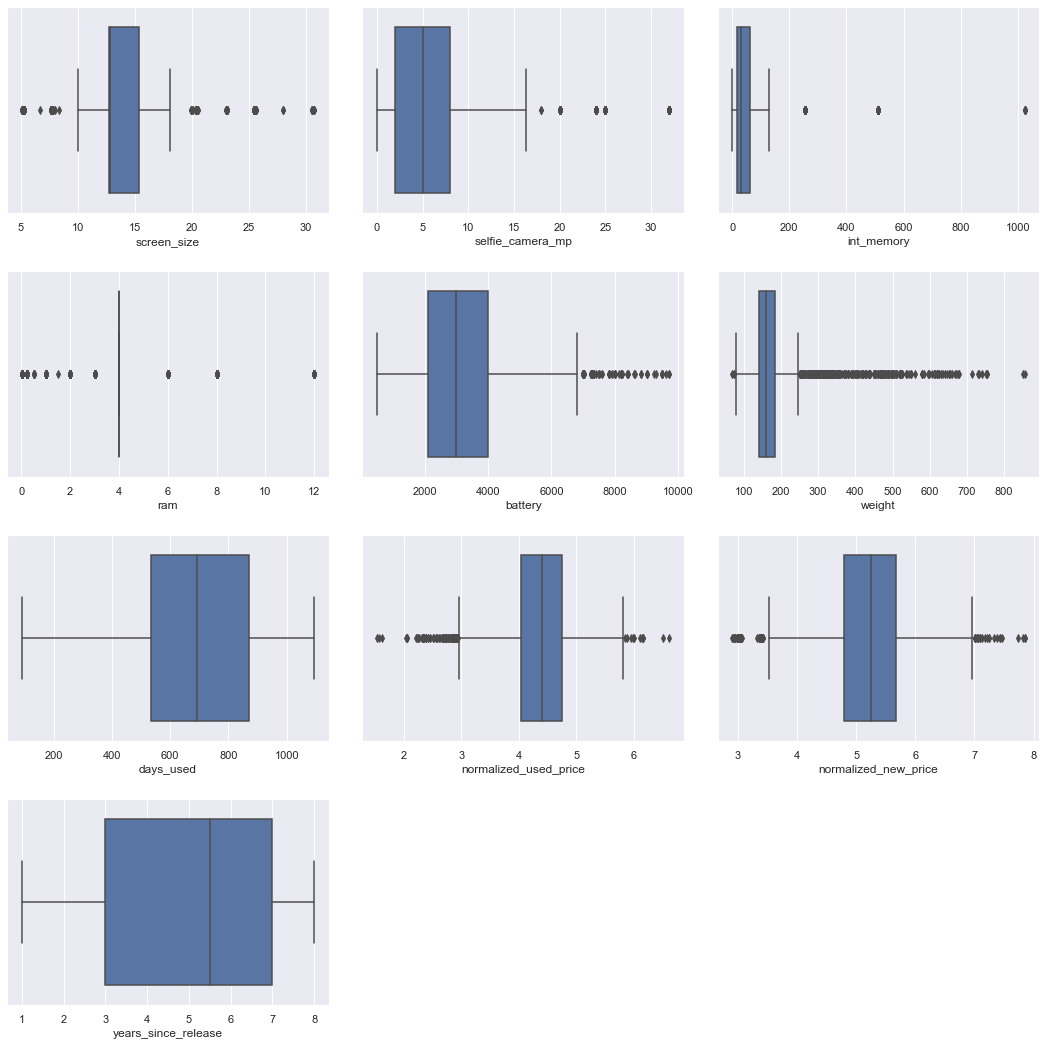

In [78]:
# detection of atypical values ​​using boxplootnum_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are enough atypical values ​​in the data.- However, we will not treat them as if they were our own values.

### Data preparation for modeling

- We want to predict the standardized price of the used devices- Before proceeding to build a model, we will have to encode categorical characteristics- We will divide the data into training and testing to evaluate the model we build with training data.- We will build a linear regression model using training data and then verify your performance

In [79]:
# We define dependent and independent variablesX = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2    

In [80]:
# Add the interception to the dataX = sm.add_constant(X)

In [81]:
# We create Dummy variablesX = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  
## We create fictitious values ​​for independent characteristicsX.head()

,const,screen_size,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,main_camera_mp_20.1,main_camera_mp_12.6,main_camera_mp_16.3,main_camera_mp_22.6,main_camera_mp_19.0,main_camera_mp_21.5,main_camera_mp_21.2,main_camera_mp_8.1,main_camera_mp_1.2,main_camera_mp_22.5
0,1.0,14.50,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,17.30,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,16.69,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,25.50,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,15.32,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# The data is divided into a proportion of 70:30 to train test datax_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
## Code to divide the data into training and testing in a specific proportion

In [83]:
print("Numero de filas en los datos de entrenamiento =", x_train.shape[0])
print("Número de filas en los datos de prueba =", x_test.shape[0])

Numero de filas en los datos de entrenamiento = 2417
Número de filas en los datos de prueba = 1037


## Building the model - Linear regression

In [84]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
## Code to adapt to the OLS modelprint(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.850
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     159.2
Date:                   Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                           19:27:41   Log-Likelihood:                 163.90
No. Observations:                   2417   AIC:                            -159.8
Df Residuals:                       2333   BIC:                             326.6
Df Model:                             83                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

### Interpretation of the regression results:

1. ** adjusted. R-Squared **: Reflects the adjustment of the model ..- A tight R-Cuaded values ​​generally vary from 0 to 1, where a higher value generally indicates a better adjustment, assuming certain conditions are met.- In our case, the value of adj. R-square is ** 0.850 **, which is good.

2. *** Const*coefficient **: It is the intercept in Y.- It means that if all the coefficients of the predictor variables are zero, then the expected exit (that is, and) would be equal to the constant coefficient.- In our case, the value of the `const` coefficient is ** 1.6815 **

3. ** Coefficient of the predictor variable **: Represents the change in the exit and due to a change in the predicting variable (everything else remains constant).- In our case, the coefficient of `screen_size` is ** 0.0238 **.

### checking model performance

** Let's check the model performance using different metrics. **
* We will use defined metric functions in Skleran for RMSE, MAE and $ r^2 $.* We will define a function to calculate mape and $ r^2 titted.* We will create a function that will print all the previous metrics at once.

In [85]:
# Function Function Fitdef adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# MAPE calculate functiondef mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to calculate different metrics to check the performance of a regression modeldef model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

# we predict using independent variables    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # para calcular R-cuadrado
    adjr2 = adj_r2_score(predictors, target, pred)  # para calcular R-cuadrado ajustado
    rmse = np.sqrt(mean_squared_error(target, pred))  # para calcular RMSE
    mae = mean_absolute_error(target, pred)  # para calcular MAE
    mape = mape_score(target, pred)  # para calcular MAPE

# We create a metric data frame    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [86]:
# Model performance verification in the train set (70 % of seen data)print("Rendimiento del entrenamiento\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Rendimiento del entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226107,0.17736,0.849942,0.844202,4.247918


In [87]:
# Checking model performance in the test set (30 % of seen data)print("Rendimiento de la prueba\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
## We check the test data performanceolsmodel1_test_perf


Rendimiento de la prueba



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239404,0.185272,0.841094,0.82616,4.495925


** Observations **
- The training $ r^2 $ is 0.849, so the model does not fit below.
- Training and RMSE tests are comparable, so the model is not overwhelmed
- MAE suggests that the model can predict the standardized price of the devices used with an average error of 0.185 in the test data.
- MAPE of 4.49 In the test data it means that we can predict within 4.49 % of the standardized price of the devices used.

## Verification of linear regression cases

We will check the following linear regression cases:
1. ** Without multicolinerality **
2. ** Linearity of the variables **
3. ** Independence of the terms of error **
4. ** Normality of the terms of error **
5. ** Without heterocedicity **

### Multicolinerality test

- We will try the multicolinerality using vif.
- ** General rule **:- If VIF is 1, then there is no correlation between the predictor $ K $ that and the remaining predictor variables.- If the vif exceeds 5 or is close to overcome 5, we say that there is a moderate multicolinerality.- If VIF is 10 or greater than 10, shows signs of high multicolinerality.

Let's define a function to verify vif.

In [88]:
# We import the library to verify viffrom statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

# calculating vif for each feature    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif



In [89]:
# We verify vif in training datachecking_vif(x_train) 

C:\Users\guerr\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\guerr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,293.713519
1,screen_size,8.072753
2,selfie_camera_mp,2.897750
3,int_memory,1.434004
4,ram,2.375248
...,...,...
84,main_camera_mp_21.5,1.033344
85,main_camera_mp_21.2,1.059116
86,main_camera_mp_8.1,1.137137
87,main_camera_mp_1.2,1.043345


* There is a very high vif value column, indicating the presence of a strong multicolinerality* We will systematically eliminate the numerical column with vif> 5* We will ignore the VIF values ​​for fictitious and constant variables (intersection)

### Delete multicolinerality (if necessary)


To eliminate multicolinerality
1. We will eliminate the column that has a VIF score greater than 5.2. Observe the adjusted R-Cuadrado value and the RMSE of all these models.3. Discard the variable that makes the slightest change in adjusted R-Cuadrado.4. Repeal the VIF scores.5. and if it is possible to continue until you get all VIF scores below 5.
Let's define a function that helps us do this.

In [90]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
# empty lists to store adj. RMSE and RMSE VALUES    adj_r2 = []
    rmse = []

# OLS models are created by releasing one of the high vif columns at the same time# The RMSE and the RMSE adjusted in the previously defined lists are stored    for cols in high_vif_columns:
# defining the new training set        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

# We create the model        olsmodel = sm.OLS(target, train).fit()

# adding adj. R-Cuadrado and RMSE to the lists        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

# We create a data frame for the results    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [91]:
## We specify the columns with high vifcol_list = ['screen_size'] 

## We verify the effect effect of the model after eliminating specific columns of training data.res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841532,0.232404


In [92]:
## We specify the column to be placedcol_to_drop = 'screen_size' 
## We specify the training data in the specified columnx_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
# We specify the test data to be deleted in the specified columnx_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] 
# We now vifvif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

C:\Users\guerr\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\guerr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF after dropping  screen_size


,feature,VIF
0,const,261.128293
1,selfie_camera_mp,2.892087
2,int_memory,1.433551
3,ram,2.374681
4,battery,4.072823
...,...,...
83,main_camera_mp_21.5,1.033195
84,main_camera_mp_21.2,1.059081
85,main_camera_mp_8.1,1.126108
86,main_camera_mp_1.2,1.043186


* We have dealt with multicolinerality in the data.* Let's rebuild the model using the updated set of predictor variables

In [93]:
# We verify the model againolsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     157.5
Date:                   Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                           19:28:27   Log-Likelihood:                 139.73
No. Observations:                   2417   AIC:                            -113.5
Df Residuals:                       2334   BIC:                             367.1
Df Model:                             82                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

### Interpreting the regression results:

4. ** STD Err **: Reflects the level of precision of coefficients.- The lower, the greater the level of precision.

5. ** P> | t | **: It is the value p.   
* For each independent characteristic, there is a null hypothesis and an alternative hypothesis. Here $ \ beta_i $ is the coefficient of the $ i $ this independent variable.
- $ H_O $: The independent characteristic is not significant ($ \ beta_i = 0 $)- $ H_A $: The independent characteristic is that it is significant ($ \ beta_i \ neq 0 $)
* (P> | t |) Give the value P for each independent characteristic to verify that null hypothesis. We are considering 0.05 (5%) as a level of significance.        
- A value of P less than 0.05 is considered statistically significant.

6. ** Trust interval **: Represents the range in which our coefficients are likely to fall (with a 95%probability).

** Observations **
- We can see that adj. R-Squared has dropped from 0.845 to 0.842, which shows that the eliminated column did not have much effect on the model.- As there is no multicolinerality, we can look at the P values ​​of the predictor variables to verify their importance.


### Discard high value variables P (if necessary)
- We will eliminate the predictor variables that have a value of P greater than 0.05, since they do not have a significant impact on the target variable.- But sometimes P values ​​change after eliminating a variable. Therefore, we will not eliminate all the variables at the same time.- Instead, we will do the following:- Create a model, verify the P values ​​of the variables and remove the column with the highest P value.- Create a new model without the eliminated function, verify the values ​​P of the variables and eliminate the column with the highest P value.- Repeat the two previous steps until there are columns with P> 0.05.
The previous process can also be done manually selecting a variable while having a high P value, discarding it and building a model again. But that can be a bit tedious and using a loop will be more efficient.

In [94]:
# initial column listpredictors = x_train2.copy()  
# We verify the P values ​​in the correct data setcols = predictors.columns.tolist()

# We establish an initial maximum P valuemax_p_value = 1

while len(cols) > 0:
# We define the training set    x_train_aux = predictors[cols]

# adjusting the model    model = sm.OLS(y_train, x_train_aux).fit()

# We get the P values ​​and maximum P value    p_values = model.pvalues
    max_p_value = max(p_values)

# Name of the variable with maximum P value    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Nokia', 'brand_name_Samsung', 'brand_name_Xiaomi', 'os_Others', '4g_yes', 'main_camera_mp_8.0', 'main_camera_mp_5.0', 'main_camera_mp_3.15', 'main_camera_mp_2.0', 'main_camera_mp_16.0', 'main_camera_mp_0.3', 'main_camera_mp_48.0', 'main_camera_mp_1.3', 'main_camera_mp_0.08', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_6.7']


In [95]:
# We specify the training data in the specified columnsx_train3 = x_train2[selected_features]  
# Eespecify the test data in the specified columnsx_test3 = x_test2[selected_features] 

In [96]:
## We adjust the OLS () code in an updated data set## (without multicolinerality and without insignificant predictors)olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     585.6
Date:                   Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                           19:28:34   Log-Likelihood:                 111.59
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2394   BIC:                            -44.01
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [97]:
# We check the model performance in the training set (70 % of data seen)print("Rendimiento del entrenamiento\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2,x_train3, y_train) 
## We verify the performance in training dataolsmodel2_train_perf

Rendimiento del entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231053,0.180675,0.843304,0.841798,4.32716


In [98]:
# We check the model performance in the test set (30 % of seen data)print("Rendimiento de la prueba\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2,x_test3, y_test) 
## We verify the performance in the test dataolsmodel2_test_perf

Rendimiento de la prueba



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241528,0.187329,0.838262,0.834589,4.541924


** Observations **
* Now, no function has a value P greater than 0.05, so we will consider the functions in * x_train3 * as the final set of predictory variables and * olsmodel2 * as the final model with which to advance* Now the adjusted R-Cuadrado is 0.843, that is, our model can explain ~ 84% of the variance* The R-Cuadrado adjusted in * olsmodel1 * (where we consider the variables without multicolinerality) was 0.843* This shows that the variables we discard were not affecting the model* RMSE and MAE values ​​are comparable for trial and training sets, indicating that the model is not overhabing

** Now we will review the rest of the assumptions in*OSmod2*. **
2. ** Linearity of the variables **
3. ** Independence of the terms of error **
4. ** Normality of the terms of error **
5. ** Without heterocedicity **

### Linear and independence test

- We will test the linearity and independence making a graph of adjusted values ​​against waste and checking patterns.- If there is no pattern, we say that the model is linear and the waste is independent.- Otherwise, the model shows signs of non -linearity and the waste is not independent.

In [99]:
# We create a data frame with real, adjusted and residual valuesdf_pred = pd.DataFrame()
#current valuedf_pred["Actual Values"] = y_train  
#predictive valuedf_pred["Fitted Values"] = olsmodel2.fittedvalues  
# wastedf_pred["Residuals"] = olsmodel2.resid 
# We visualize the first 5 datadf_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.884247,0.203240
1525,4.448399,4.603789,-0.155390
1128,4.315353,4.308614,0.006738
3003,4.282068,4.190362,0.091706
2907,4.456438,4.505087,-0.048649


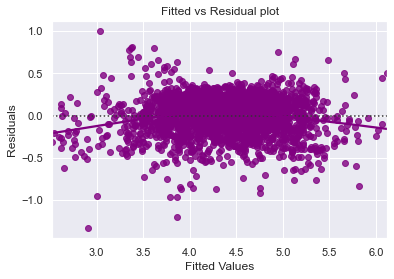

In [100]:
# We graph the adjusted values ​​against wastesns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The dispersion chart shows the distribution of waste (errors) against adjusted values ​​(planned values).
* If there is any pattern in this graph, we consider it as signs of non -linearity in the data and a pattern means that the model does not capture non -linear effects.
*** We do not see any pattern in the diagram above. Therefore, the assumptions of linearity and independence are fulfilled. **

### Normality test
-We will test the normality checking the distribution of waste, checking the Q-Q graph of waste and using the shapiro-wilk test.- If the waste follows a normal distribution, they will form a straight line chart, otherwise not.- If the P value of the Shapiro-Wilk test is greater than 0.05, we can say that the waste is normally distributed.

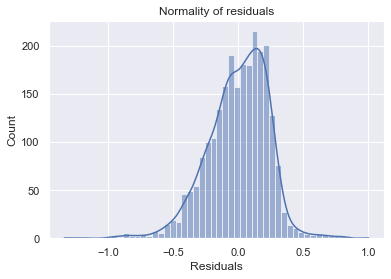

In [101]:
## Code to trace the distribution of wastesns.histplot(data=df_pred, x="Residuals", kde=True) 
plt.title("Normality of residuals")
plt.show()

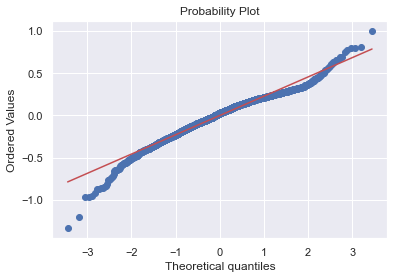

In [102]:
# We import liberrias for the Q-Q plot of code verificationimport pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) 
plt.show()

- Waste remains more or less a straight line except for tails.- Let's check the Shapiro-Wilk test results.

In [103]:
## We apply the Shapiro-Wilks teststats.shapiro(df_pred["Residuals"]) 

ShapiroResult(statistic=0.9726271629333496, pvalue=4.224088270881534e-21)

- Since the value of P <0.05, the waste is not normal according to the Shapiro-Wilk test.- Strictly speaking, waste is not normal.- However, as an approach, we can accept this distribution as close to normal.- ** Then, the assumption is fulfilled. **

### Homoscedasticity test

- We will test the homocedasticity using the Goldfeldquandt test.- If we obtain a value P greater than 0.05, we can say that the waste is homocedic. Otherwise, they are heteroscedicic.

In [104]:
# We import the library to execute homocedicity using the Goldfeldquandt test.import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) 
## We apply the Goldfeld Quandt testlzip(name, test)

[('F statistic', 1.0604729462425802), ('p-value', 0.15606511727489936)]

** Since P-Value> 0.05, we can say that the waste is homocedic. So, this assumption is fulfilled. **

## Predictions on trial data

Now that we have verified all the assumptions of linear regression and are satisfied, let's continue with the prediction.

In [105]:
# Predictions in the test setpred = olsmodel2.predict(x_test3)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.429667
2341,3.696103,4.020496
1913,3.592093,3.660942
688,4.306495,4.107807
650,4.522115,5.179033
2291,4.259294,4.404081
40,4.997685,5.439022
1884,3.875359,4.062300
2538,4.206631,4.026504
45,5.380450,5.254659


- We can see here that our model has yielded quite good prediction, and real values ​​and predicted are comparable.

## Summary of the final model

In [106]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     585.6
Date:                   Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                           19:28:55   Log-Likelihood:                 111.59
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2394   BIC:                            -44.01
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [107]:
# We check the model performance in the training set (70 % of seen data)print("Rendimiento del entrenamiento\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final,x_train3, y_train) 
## We verify the performance in training dataolsmodel_final_train_perf

Rendimiento del entrenamiento



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231053,0.180675,0.843304,0.841798,4.32716


In [108]:
# We check the model performance in the test set (30 % of seen data)print("Rendimiento de la prueba\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final,x_test3, y_test)
## We verify the performance in the test dataolsmodel_final_test_perf

Rendimiento de la prueba



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241528,0.187329,0.838262,0.834589,4.541924


* The model is able to explain ~ 84% of the variation in the data
* The training and RMSE test are low and comparable. So, our model does not suffer from overhap.
* The MAPE in the test set suggests that we can predict within 4.54% in the standardized price of the device used.
* Therefore, we can conclude that the model * olsmodel_final * is good for both prediction and inference

## Conclusions

1. The model is able to explain ~ 84 % of the variation in the data and within 4.54 % in the standardized price of the device used in the test data, which is good- This indicates that the model is good for both prediction and inference.

2. If Screen_Size increases by 0.0238, all other variables remain constant.

3. The training 𝑅2r2 is 0.849, so the model does not fit below.

4. The training and RMSE test are comparable, so the model is not overwhelmed either.

5. MAPE of 4.49 In the test data it means that we can predict within 4.49 % of the standardized price of the devices used.

6. We can see that adj. R-Squared has dropped from 0.845 to 0.842, which shows that the eliminated column did not have much effect on the model.

7. Since there is no multicolinerality, we can look at the P values ​​of the predictor variables to verify their importance.

8. The assumptions of linearity and independence are fulfilled.

9. There are enough atypical values ​​in the data.

10. The price is higher for new 5G devices.
11. The trend is ascending from 2013 to 2018, from 2019 and 2020 the trend increases, but not as considerable as in the previous years.
12. The Sony brand is the highest frontal resolution and BlackBerry the one that has the least front resolution.
13. The Huawei, Vivo and OPPO brand provide a good resolution in selfies in the devices they offer, being Meisu that of lower quality in selfies.
14. The Huawei, Samsung and Others
15. Only 4 marks exceed the average of 4 GB in RAM. (Honor, OnePlus, Oppo, Pealme and Google).
16. There is a correlation between Battery, RAM, Selfie_Camara_MP, Main_camara_MP and Screen_size variables with the standardized price.
17. Android is the most used operating system, followed by OThers and thirdly this Windows and ultimately this iOS.
18. Others is the largest brand used, the Samsung brand is second, in third Huawei. Being the last most used Alcatel brand.

## Recommendations

1. would be perfect if they add more categories to their data to have more comparative, for example, age, sex, region (of device users). With the intension of seeing the sharing of the dipositive and how the market can be segmented.
2. It is understood that the iPhone brand of the Macintosh company is one of the most expensive in the market, however, many people buy this device brand even being very late models. And graphically it was shown that the Others brand is above the others. (We assume that the iPhone brand is within the Others category, in data science, there are no assumptions. Therefore we recommend if it is possible to put it in the database to see the behavior of this iPhone brand).
3. The trend indicates that the devices used is larger than the new ones, at least in the last years, due to the high price of the new devices even having better technology.

4. We see how the business of the devices used between 6 and 8 more years, perhaps more.

---------